# DAMASK tutorial for cold rolling test with regridding

- creating necessary inputs for damask
- defining the elastoplastic model (with powerlaw) for tensile test
- runing the damask jobs
- do the regridding

here more option is given to the user to select from damask python package itself.

Author: Yang Bai

Date  : 06.09.2022

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
from damask import Rotation # this will be used in material configuration

### create a 'project' to manage all the configurations for a tensile test

In [2]:
pr = Project('stresscurve')
pr.remove_jobs(silently=True) # automatically delete the existing project folder

### Creating the Damask job

In [3]:
job = pr.create.job.ROLLING('damask_job')

#### for a damask job, one needs:
- geometry information(i.e., the mesh)
- material configuration(material.yaml)
- boundary conditions(i.e., loading.yaml)

### For material configuration
#### for elastoplastic material

In [4]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)

# for plastic deformation, we use the power law
plasticity = pr.continuum.damask.Plasticity(type='phenopowerlaw',
                                            N_sl=[12], a_sl=2.25,
                                            atol_xi=1.0, dot_gamma_0_sl=0.001,
                                            h_0_sl_sl=75e6, h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4, 1.4],
                                            n_sl=20, output=['xi_sl'],
                                            xi_0_sl=[31e6], xi_inf_sl=[63e6])


#### for material configuration, you need
- phase
- roation
- homogenization

In [5]:
grains, grids = 8,8 # for the number of grains and grids

phase = pr.continuum.damask.Phase(composition='Aluminum', lattice= 'cF',
                         output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
                         elasticity=elasticity,plasticity=plasticity)
rotation = pr.continuum.damask.Rotation(Rotation.from_random, grains)
homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})
# now you can define your material.yaml configuration
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)
# now you can save your material to your job
job.material = material

## For geometry information

In [6]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1.0e-5, 
                                                         grid_dim=grids, 
                                                         num_grains=grains)
# save the geometry information to your job
job.grid = grid 

## Configure the rolling test (boundary conditions)

In [7]:
job.rolling_parameters(number_passes=1,# number of rolling procedure
                       height_reduction=0.05,# compresseion height
                       rolling_speed=2.0e-3,# rolling speed 1/s
                       contact_length=1.0, # for the contact length
                       increments=400,# time steps for each rolling
                       regridding=False)

## Do the rolling test

working direction is: /home/by/Projects/Github/pyiron_continuum/notebooks/stresscurve/damask_job_hdf5/damask_job
Remove all the results ...
--------------------------------------------------------------
Do the rolling-1 test ...
Run damask simulation from  /home/by/Projects/Github/pyiron_continuum/notebooks/stresscurve/damask_job_hdf5/damask_job
solver: {mechanical: spectral_basic}

loadstep:
  - boundary_conditions:
      mechanical:
        P:
          - [0, x, x]
          - [x, x, x]
          - [x, x, x]
        dot_F:
          - [x, 0, 0]
          - [0, 0, 0]
          - [0, 0, -0.002]
    discretization: {t: 25.0, N: 400}
    f_out: 5
    f_restart: 5

Using rolling-1.yaml as loading
Damask command is: DAMASK_grid -g damask.vti -l rolling-1.yaml > rolling-1.log


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


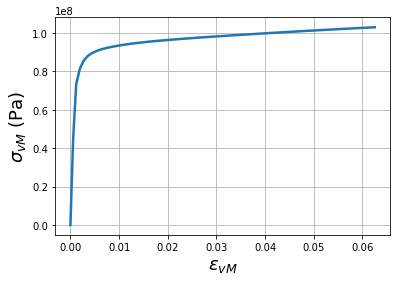

In [8]:
job.run_rolling()# job.run()

In [9]:
# for result in job._rollresults:
#     result.export_VTK()
#     print('done! ')
# visiualization for deformed/regridded RVE (instead of paraview)

In [10]:
print(job._vonMises_stress)
print(job._vonMises_strain)

[array([1.10783367e-05, 4.47785047e+07, 7.33052364e+07, 8.12402835e+07,
       8.54631507e+07, 8.77675509e+07, 8.92267831e+07, 9.02475979e+07,
       9.10207781e+07, 9.16309663e+07, 9.21401527e+07, 9.25811311e+07,
       9.29745027e+07, 9.33323095e+07, 9.36616990e+07, 9.39668372e+07,
       9.42505400e+07, 9.45148692e+07, 9.47618461e+07, 9.49933914e+07,
       9.52115531e+07, 9.54181905e+07, 9.56150459e+07, 9.58035210e+07,
       9.59848364e+07, 9.61599245e+07, 9.63296006e+07, 9.64944888e+07,
       9.66551499e+07, 9.68120223e+07, 9.69655060e+07, 9.71159231e+07,
       9.72635713e+07, 9.74086971e+07, 9.75515336e+07, 9.76922722e+07,
       9.78311029e+07, 9.79681721e+07, 9.81036387e+07, 9.82376125e+07,
       9.83702286e+07, 9.85015669e+07, 9.86317439e+07, 9.87608159e+07,
       9.88888842e+07, 9.90159871e+07, 9.91422128e+07, 9.92675846e+07,
       9.93921784e+07, 9.95160028e+07, 9.96391206e+07, 9.97615232e+07,
       9.98832586e+07, 1.00004298e+08, 1.00124675e+08, 1.00244341e+08,
     